In [14]:
import pandas as pd
dataset=pd.read_csv("Placement.csv")
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Covariance

In [15]:
dataset.cov(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-58.106028,-40.413645,52.556168,8.102336,3.616177e+05
ssc_p,-52.641355,117.228377,60.348373,42.897137,37.659225,24.535952,2.877739e+04
hsc_p,-58.106028,60.348373,118.755706,34.819820,35.461678,22.555846,6.697772e+04
degree_p,-40.413645,42.897137,34.819820,54.151103,21.929469,17.272020,-1.173995e+04
etest_p,52.556168,37.659225,35.461678,21.929469,176.251018,16.886973,2.287876e+05
mba_p,8.102336,24.535952,22.555846,17.272020,16.886973,34.028376,9.624979e+04
salary,361617.668689,28777.386468,66977.716032,-11739.948520,228787.619507,96249.789024,8.734295e+09


# Correlation

In [16]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [17]:
corr_with_target = dataset.select_dtypes(include='number')\
                          .corrwith(dataset["mba_p"])\
                          .sort_values(ascending=False)

print(corr_with_target)


mba_p       1.000000
degree_p    0.402364
ssc_p       0.388478
hsc_p       0.354823
etest_p     0.218055
salary      0.175013
sl_no       0.022327
dtype: float64


# Preprocessing

In [18]:
dataset=dataset.drop(columns='sl_no')
dataset=dataset.dropna()

# Visulaize the pair

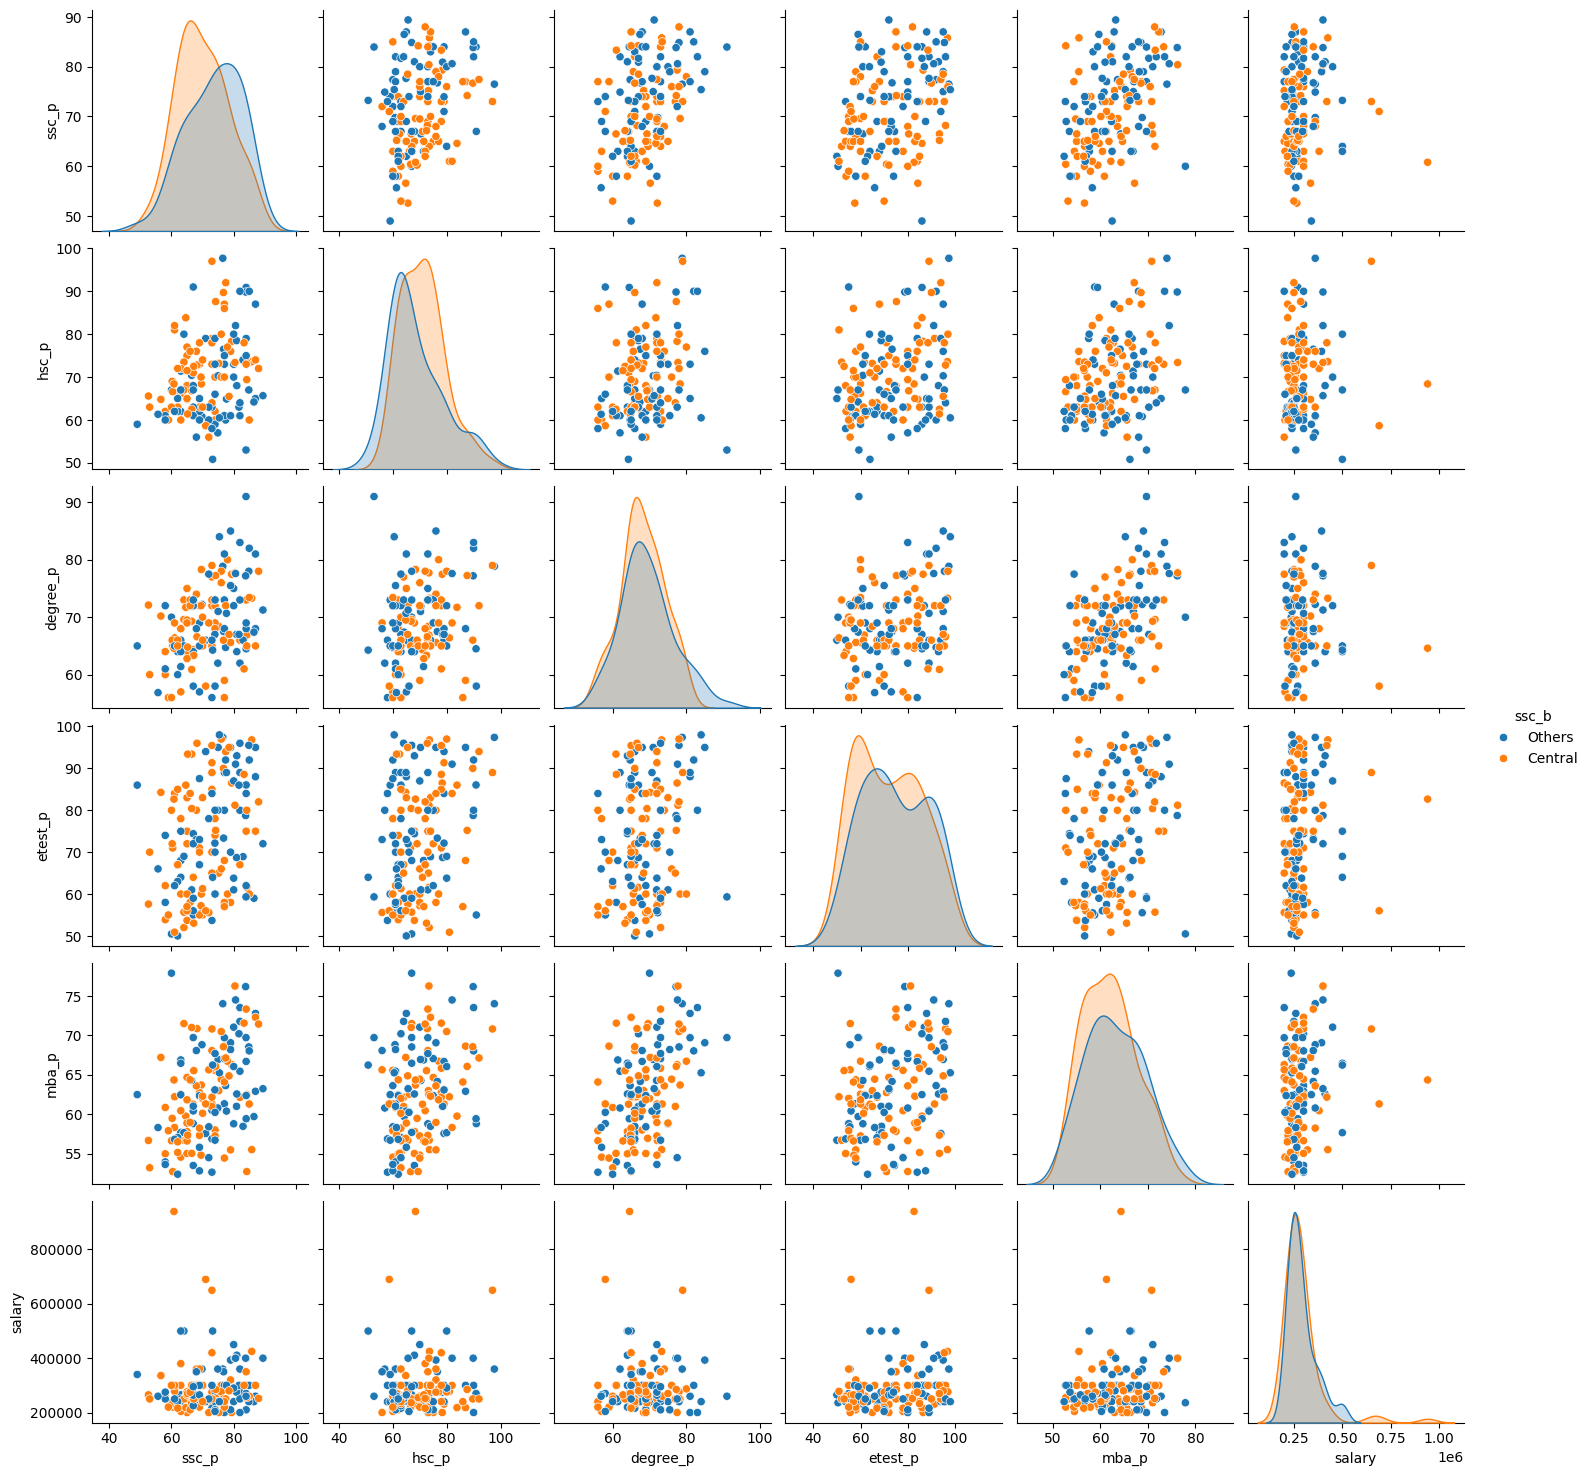

In [19]:
import seaborn as sns
sns.pairplot(dataset,hue="ssc_b")

import matplotlib.pyplot as plt
plt.savefig('pairplot_ssc_b.png')

# Calling user defined function Descriptive file

In [30]:
import os
os.listdir()

['Bivariate-1.ipynb',
 'Bivariate.ipynb',
 'Hypthesis.pdf',
 'Inferential Analysis.ipynb',
 'Inferential Analysis_Question_Hope Artificial Intelligence.pdf',
 'InferentialAnalysisQuestion.docx',
 'pairplot_ssc_b.png',
 'Placement.csv',
 'PrePlacement.csv']

In [34]:
class Descriptive:

    def mean(self, data):
        return sum(data) / len(data)

    def median(self, data):
        data = sorted(data)
        n = len(data)
        if n % 2 == 0:
            return (data[n//2-1] + data[n//2]) / 2
        else:
            return data[n//2]

    def variance(self, data):
        m = self.mean(data)
        return sum((x - m) ** 2 for x in data) / len(data)

    def std(self, data):
        return self.variance(data) ** 0.5


In [37]:
from Descriptive import Descriptive

obj = Descriptive()

print(obj.mean([1,2,3,4,5]))
print(obj.median([1,2,3,4,5]))


ModuleNotFoundError: No module named 'Descriptive'

# Sregrating quantitative Data and qualtative

In [ ]:
quan,qual=obj.segreQuanQual(dataset)

The Quantitative Data: ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
The Qualtitative Data ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [ ]:
quan_data=dataset[quan]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(quan_data)

MissingDataError: exog contains inf or nans

In [ ]:
quan_data=dataset[['etest_p','salary',]]

# Univarite Analysis

## Probability Density Function(PDF)

In [ ]:
# Density Polt

import seaborn as sns
x=dataset['ssc_p']
ax = sns.distplot(dataset['ssc_p'],kde=True)

In [ ]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

In [ ]:
get_pdf_probability(dataset['ssc_p'],60,60)

# cumulative Density function

In [ ]:
import matplotlib.pyplot as plt
x=dataset['ssc_p']
plt.hist(x,cumulative=True, density=True,bins=100)

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(65)

# Types of Test

# Z- Score: Normal distribution to Standard Normal Distribution

In [ ]:
# Normal Distribution
import seaborn as sns
sns.distplot(dataset['ssc_p'],kde=True)

In [ ]:
# Coverted to standard Normal Distribution
import seaborn as sns
mean=dataset['ssc_p'].mean()
std=dataset['ssc_p'].std()

values=[i for i in dataset['ssc_p']]

z_score=[((j-mean)/std) for j in values]

sns.distplot(z_score,kde=True)

sum(z_score)/len(z_score)
#z_score.std()


In [ ]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
dataset[dataset["gender"]=="M"]["salary"]

0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
209    216000.0
210    400000.0
211    275000.0
212    295000.0
214         NaN
Name: salary, Length: 139, dtype: float64

# T-Test

#### Independant Sample
Diferrent Group(Male, Female) but same contion(salary)

In [ ]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['salary']
female = dataset[dataset['gender']=='F']['salary']
#print(male)
ttest_ind(male, female)

Ttest_indResult(statistic=1.9448521615505496, pvalue=0.053714668806405776)

#### Dependant Sample
Same Group(Male) but Different Condition(ssc_p,hsc_p)


In [ ]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)


Ttest_relResult(statistic=0.881726473207718, pvalue=0.38006050142386016)

### for one sample mean

should same for different sample

scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')

# ANAVO : Analysis of Variance

## One-Way Classification

In [ ]:
import scipy.stats as stats

stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])


F_onewayResult(statistic=0.6719700864663097, pvalue=0.5110602818995302)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('degree_p ~ C(ssc_p) + C(hsc_p) + C(ssc_p):C(hsc_p)', data=dataset).fit()
sm.stats.anova_lm(model, typ=2)

C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Anaconda3\envs\ML\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 96, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
